# Recommender Systems

 **Recommender systems** aim to predict users’ interests and recommend product items that quite likely are interesting for them. They are among the most powerful machine learning systems that online retailers implement in order to drive sales.



![image.png](movies.jpg)

![image.png](recommendation-systems_updation.png)

There has been lot of updation in recommendation system's algorithms. We are going to build some basic recommendation systems here.

**Lets Start Recommending..**

## 1.Average Weighted Method

Currently IMDb has a formula for their rating system where viewers’ votes are plugged into to change the movies rating. This formula is employed to prevent extreme votes from skewing the data and providing an inaccurate result. 

Most people might not even realize that the score that they see is not the actual average of the votes submitted. That is because the actual rating is weighted. The weighting occurs so that more regular voters have a more influential vote.

![image.jpg](weighted_avg_image.png)


http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
credits = pd.read_csv("D:\\kaggle\\recommendation\\tmdb_5000_credits.csv")
movies_df = pd.read_csv("D:\\kaggle\\recommendation\\tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
print('Shape of our Data:\n')
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Shape of our Data:

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [6]:
print('Nulls in credit datasets are :',credits.isna().sum().sum())
print('\nNulls in movies datasets are :')
nulls=movies_df.isna().sum()
pd.DataFrame(nulls[nulls>0],columns=['No of nulls'])

Nulls in credit datasets are : 0

Nulls in movies datasets are :


,No of nulls
homepage,3091
overview,3
release_date,1
runtime,2
tagline,844


In [7]:
# Merging both datasets on "movie_id" column after renaming it to 'id'
# Also taking only relevant feature

credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')

movies_cleaned_df=movies_df_merge[[ 'id','original_title','overview','popularity','tagline','vote_average','vote_count']]
movies_cleaned_df.head(5)

,id,original_title,overview,popularity,tagline,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,The Legend Ends,7.6,9106
4,49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another.",6.1,2124


In [8]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
id                4803 non-null int64
original_title    4803 non-null object
overview          4800 non-null object
popularity        4803 non-null float64
tagline           3959 non-null object
vote_average      4803 non-null float64
vote_count        4803 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 300.2+ KB


### Using Weighted average for each movie's  Average Rating

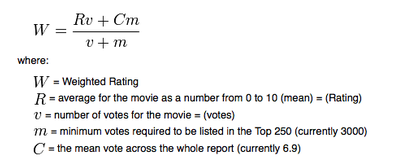

In [9]:
# Calculate all the components based on the above formula
v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)

In [10]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [11]:
movies_cleaned_df.head(2)

,id,original_title,overview,popularity,tagline,vote_average,vote_count,weighted_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora.,7.2,11800,7.148013
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins.",6.9,4500,6.807627


In [12]:
movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(15)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


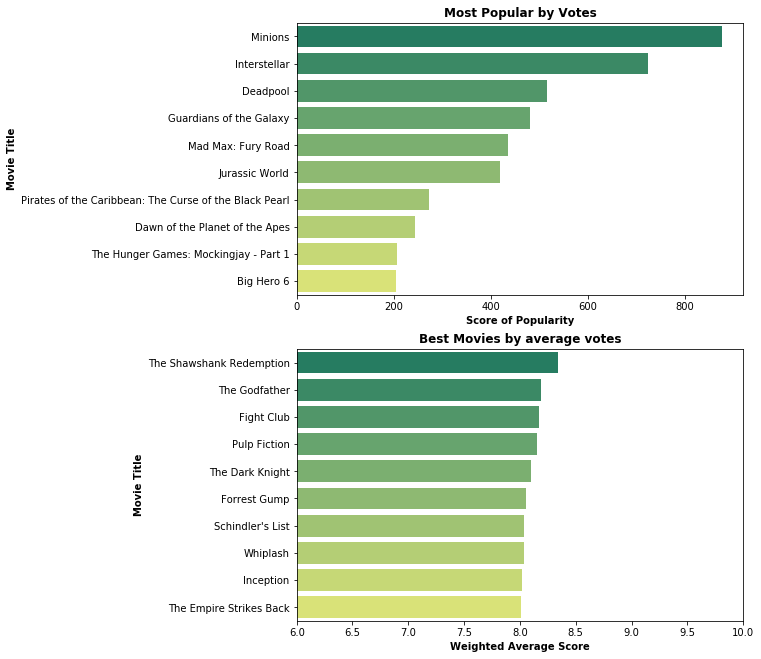

In [13]:

weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)

plt.figure(figsize=(8,11))
plt.subplot(211)
sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity,palette='summer')
plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

plt.subplot(212)
sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10),data=weight_average,palette='summer')
plt.xlim(6, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')


### Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [15]:
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [16]:
movies_cleaned_df.head(2)

,id,original_title,overview,popularity,tagline,vote_average,vote_count,weighted_average,normalized_weight_average,normalized_popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora.,7.2,11800,7.148013,0.674339,0.171815
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins.",6.9,4500,6.807627,0.581403,0.158846


In [17]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average']*0.5 + movies_cleaned_df['normalized_popularity']*0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


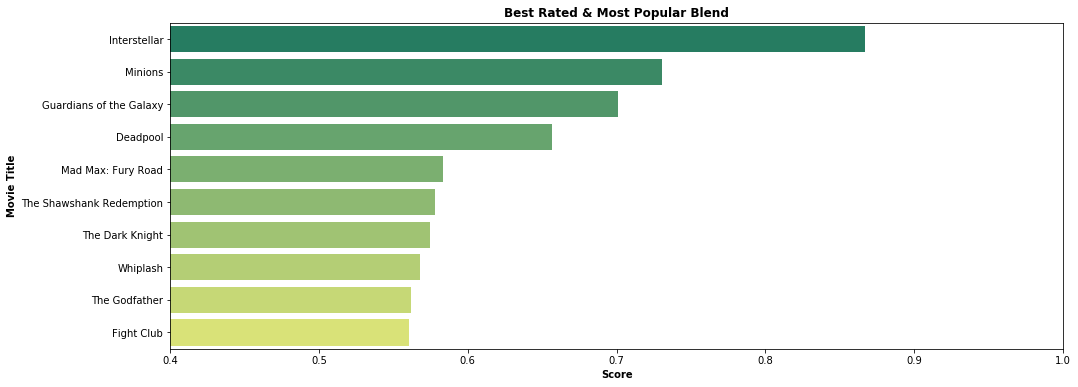

In [18]:

scored_df = movies_cleaned_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='summer')
plt.xlim(0.4, 1)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('scored_movies.png')

## 2.Content Based Recommendation System

A Content-based recommendation system tries to recommend items to users based on their profile. The user's profile revolves around that user's preferences and tastes. It is shaped based on user ratings, including the number of times that user has clicked on different items or perhaps even liked those items.

![image.png](recommend_image.png)



Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [19]:
movies_cleaned_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [21]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [22]:
#print(tfv_matrix)

In [23]:
tfv_matrix.shape

(4803, 10417)

In [24]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [25]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [26]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [27]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [28]:
# Testing our content-based recommendation system with the seminal film Spy Kids

give_rec('Spy Kids')

1302    Spy Kids 2: The Island of Lost Dreams
1155                  Spy Kids 3-D: Game Over
1769      Spy Kids: All the Time in the World
4044                               Go for It!
3359                              In Too Deep
1631                                 Mr. 3000
1825                Jimmy Neutron: Boy Genius
339                           The Incredibles
3793                     The Velocity of Gary
1081                       Revolutionary Road
Name: original_title, dtype: object

 ## 3.Nearest Neighbor - Collaborative Filtering

Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

kNN is a machine learning algorithm to find clusters of similar users and make predictions and we will be using cosine similarity to best possible recommendation.

![image.png](recommend_image.png)

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

Less the angle, more will be cosine value and hence more closeness towards other records.

![image.png](cosine_similarity_image.png)

Dataset url: https://grouplens.org/datasets/movielens/latest/

In [29]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df = pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
                      dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [30]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [31]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [32]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [33]:
movie_ratingCount = df.groupby(by = ['title'])['rating'].count().reset_index().\
                    rename(columns = {'rating': 'totalRatingCount'})
    
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [34]:
rating_with_totalRatingCount = df.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(movie_ratingCount['totalRatingCount'].describe())

,totalRatingCount
count,9719.000
mean,10.375
std,22.406
min,1.000
25%,1.000
50%,3.000
75%,9.000
max,329.000


In [36]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [37]:
rating_popular_movie.shape

(41362, 5)

In [38]:
## First lets create a Pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [39]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [40]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

171


In [41]:
#selecting on the basis of who else gave same kind of ratings, as we are using collabarative filtering technique.

In [43]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Ghostbusters (a.k.a. Ghost Busters) (1984):

1: Indiana Jones and the Temple of Doom (1984), with distance of 0.32086676359176636:
2: Back to the Future (1985), with distance of 0.36783987283706665:
3: Big (1988), with distance of 0.3804514408111572:
4: Ferris Bueller's Day Off (1986), with distance of 0.3896428346633911:
5: Indiana Jones and the Last Crusade (1989), with distance of 0.39220625162124634:
